# EDA: Speed Dating Dataset

**Note that this EDA and Visuals were done before I recleaned the dataset. Although we did not use this dataset to model, I still think it provides valuable information on the Dataset.** 
- We will visualize and analyze each of the three datasets for patterns
- Provide Descriptive statistics and distributions
- Create visualizationass
- Will feature engineer where needed

**We'll start with the speed dating dataset**


In [3]:
import pandas as pd


speed_dating = pd.read_csv(r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\Speed_Dating\speed_dating_clean_2.csv")

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# Display basic info about the dataset
print("Dataset Info:")
print(speed_dating.info())

# Display summary statistics
print("\nSummary Statistics:")
print(speed_dating.describe())

# Check for missing values
print("\nMissing Values:")
print(speed_dating.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   match     8378 non-null   int64  
 2   int_corr  8378 non-null   float64
 3   age_o     8378 non-null   int64  
 4   race_o    8378 non-null   int64  
 5   pf_o_att  8378 non-null   float64
 6   dec_o     8378 non-null   int64  
 7   attr_o    8378 non-null   float64
 8   sinc_o    8378 non-null   float64
 9   intel_o   8378 non-null   float64
 10  fun_o     8378 non-null   float64
 11  amb_o     8378 non-null   float64
 12  shar_o    8378 non-null   float64
 13  age       8378 non-null   int64  
 14  field_cd  8378 non-null   float64
 15  race      8378 non-null   int64  
 16  imprace   8378 non-null   float64
 17  imprelig  8378 non-null   float64
 18  goal      8378 non-null   int64  
 19  date      8378 non-null   float64
 20  go_out    8378 n

- **Dataset Structure**
  - 78 Columns and 8378 Rows.
  - No missing values (all NaNs have been handled).
  - Majority of variables are float64, some are int64.
- **Target Variable**
  - match (1 = Yes, 0 = No): This is the key outcome variable (classification problem).
  - 16.47% Match Rate (Highly imbalanced dataset, most speed dates do not result in a match).
- **Demographics**
  - Gender: 50% Male (1), 50% Female (0) – well-balanced dataset.
  - Age: Ranges from 18 to 55 years (median: 26).
  - Race: Coded categories (1-6), with race_o (partner's race) also present.
- **Preferences & Ratings**
  - Participants rated their partner’s attributes (attr_o, sinc_o, intel_o, etc.).
  - Participants also rated their own attributes (attr3_2, sinc3_2, etc.).
  - Preferences for the ideal partner (attr1_2, sinc1_2, etc.).
  - Some columns contain 100-point allocations, while others are 1-10 ratings.
- **Activities & Interests**
  - Participants ranked their interest in sports, music, gaming, shopping, yoga, etc. (1-10 scale).
  - Some attributes have outliers (e.g., attr1_1 has a max of 100 while others are <10).

- Lets check the Dataset imbalance

C:\Users\samue\AppData\Local\Temp\ipykernel_34104\4288685166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=speed_dating, x='match', palette=sns.color_palette("coolwarm"))
C:\Users\samue\AppData\Local\Temp\ipykernel_34104\4288685166.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=speed_dating, x='match', palette=sns.color_palette("coolwarm"))


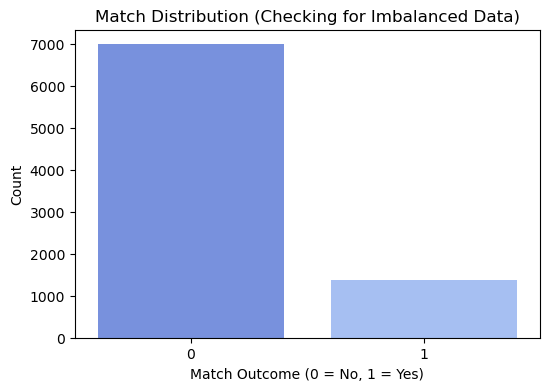

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of match outcomes
plt.figure(figsize=(6,4))
sns.countplot(data=speed_dating, x='match', palette=sns.color_palette("coolwarm"))
plt.title("Match Distribution (Checking for Imbalanced Data)")
plt.xlabel("Match Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

- Above shows a significant class imbalance. Lets proceed to plot a gender based match analysis

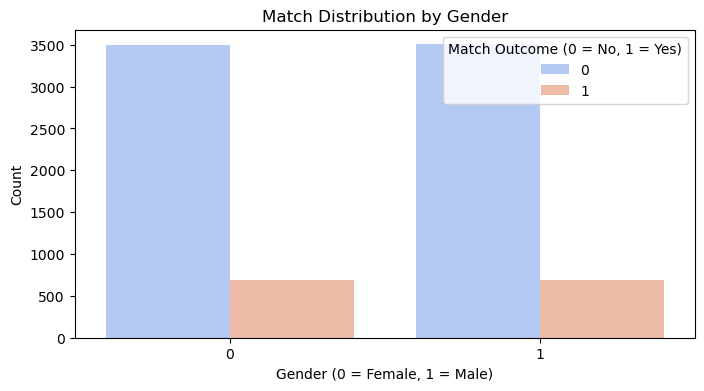

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Create a countplot to show match distribution by gender
sns.countplot(data=speed_dating, x='gender', hue='match', palette='coolwarm')

plt.title("Match Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Match Outcome (0 = No, 1 = Yes)")

plt.show()


In [9]:
# Calculate match percentage by gender
match_rate_by_gender = speed_dating.groupby('gender')['match'].mean() * 100

print("Match Rate by Gender:")
print(f"Females (0): {match_rate_by_gender[0]:.2f}%")
print(f"Males (1): {match_rate_by_gender[1]:.2f}%")

Match Rate by Gender:
Females (0): 16.49%
Males (1): 16.45%


- There does seem to be a gender bias in matching since match rates are nearly identical
- Let's analyze attributes that may influence matches

           attr      sinc     intel       fun       amb      shar
match                                                            
0      5.962332  7.044298  7.239640  6.195627  6.694341  5.315376
1      7.316667  7.803623  7.943478  7.592029  7.314130  6.688043


<Figure size 800x500 with 0 Axes>

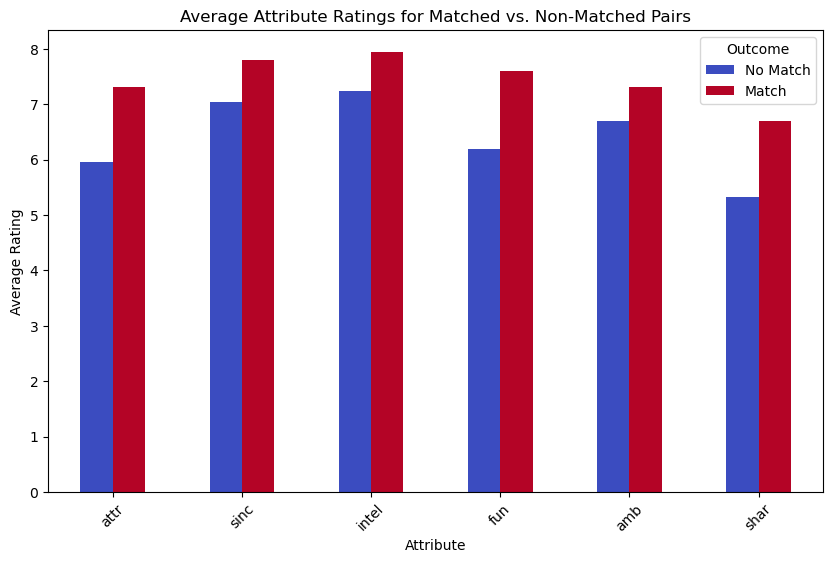

In [11]:
#  relevant attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Compute mean ratings for matched and non-matched participants
match_means = speed_dating.groupby('match')[attributes].mean()

print(match_means)

# Count plot for Average attribute ratings for matched vs non matched
plt.figure(figsize=(8, 5))
match_means.T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Average Attribute Ratings for Matched vs. Non-Matched Pairs")
plt.xlabel("Attribute")
plt.ylabel("Average Rating")
plt.legend(["No Match", "Match"], title="Outcome")
plt.xticks(rotation=45)
plt.show()

- **Attractiveness ("attr") Plays a Key Role**
  - People with higher attractiveness scores had a greater likelihood of matching.
  - suggests physical appearance strongly influences speed dating success.
    
- **Fun and Intelligence Matter Too**
  - Fun and intelligence also show noticeable differences between matched and non-matched participants.
  - This indicates that humor and intellectual compatibility could be important dating factors.
    
- **Sincerity and Ambition Show a Moderate Effect**
  - Sincere and ambitious individuals also tend to get more matches, but the difference isn’t as strong as attractiveness and fun.

- **Shared Interests Have the Least Impact**
  - While matched participants scored higher in shared interests (shar) than non-matched ones, the gap is smaller than in other attributes.
  - This suggests that while common hobbies help, they may not be as crucial in speed dating decisions.

- Let's analyze gender differences in attribute preferences

<Figure size 800x500 with 0 Axes>

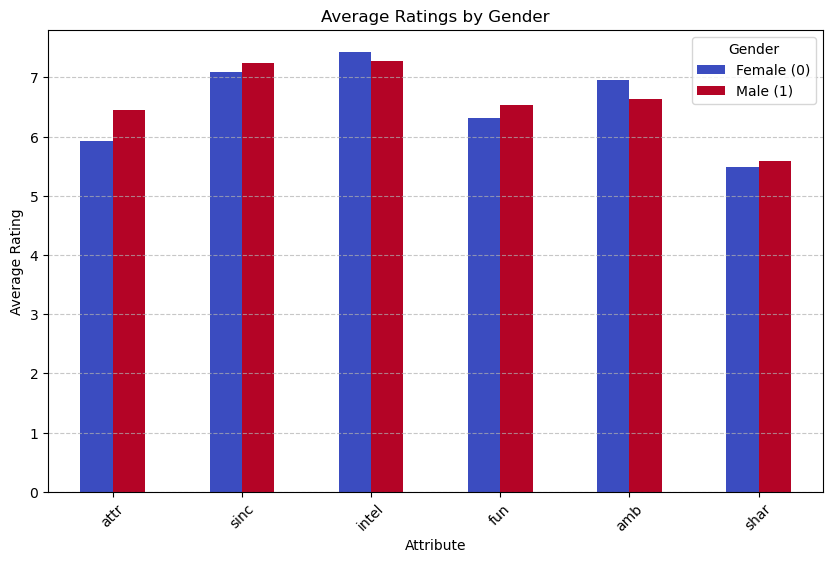

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute mean ratings for each attribute by gender
gender_ratings = speed_dating.groupby("gender")[attributes].mean()

plt.figure(figsize=(8, 5))
gender_ratings.T.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Average Ratings by Gender")
plt.ylabel("Average Rating")
plt.xlabel("Attribute")
plt.xticks(rotation=45)
plt.legend(["Female (0)", "Male (1)"], title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


- Attractiveness
  - Men rate attractiveness slightly higher than women.
  - This aligns with traditional dating preferences where physical appearance tends to be a stronger factor for men.
- Sincerity
  - Women and men rate sincerity highly, but men rate it slightly higher.
  - This suggests that sincerity is a key factor in dating decisions for both genders.
- Intelligence
  - Both genders rate intelligence similarly, with women giving slightly higher scores.
  - Intelligence appears to be an important trait for both men and women.
- Fun
  - Men rate "fun" slightly higher than women.
  - This suggests that men value a fun personality more when evaluating potential matches.
- Ambition
  - Women rate ambition slightly higher than men.
  - This supports the idea that ambition is a more desirable trait for women when choosing a partner.
- Shared Interests (shar)
  - Both genders give similar scores to shared interests.
  - This suggests that shared hobbies and interests are universally valued in dating.

- Lets see how the different attribute ratings correlate with actual match outcomes

In [17]:
#  relevant columns
attribute_cols = ["attr", "sinc", "intel", "fun", "amb", "shar", "match"]

# Compute correlation matrix
correlation_matrix = speed_dating[attribute_cols].corr()

# Display correlation of attributes with match outcome
print("Correlation of attributes with match outcome:")
print(correlation_matrix["match"].sort_values(ascending=False))

Correlation of attributes with match outcome:
match    1.000000
fun      0.270321
attr     0.260745
shar     0.251829
intel    0.171279
sinc     0.164566
amb      0.133883
Name: match, dtype: float64


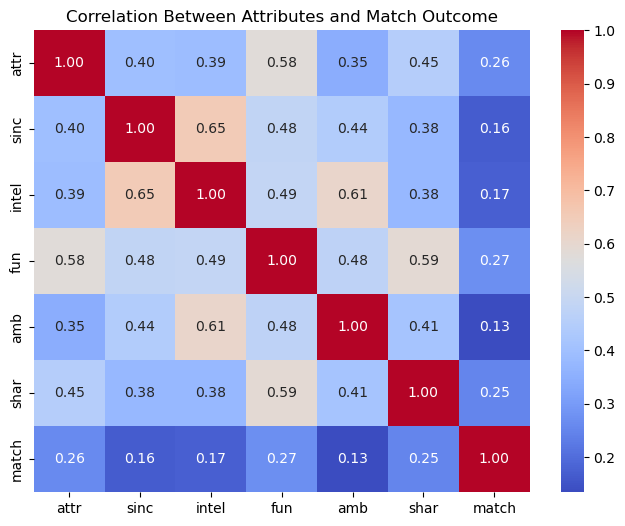

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Attributes and Match Outcome")
plt.show()

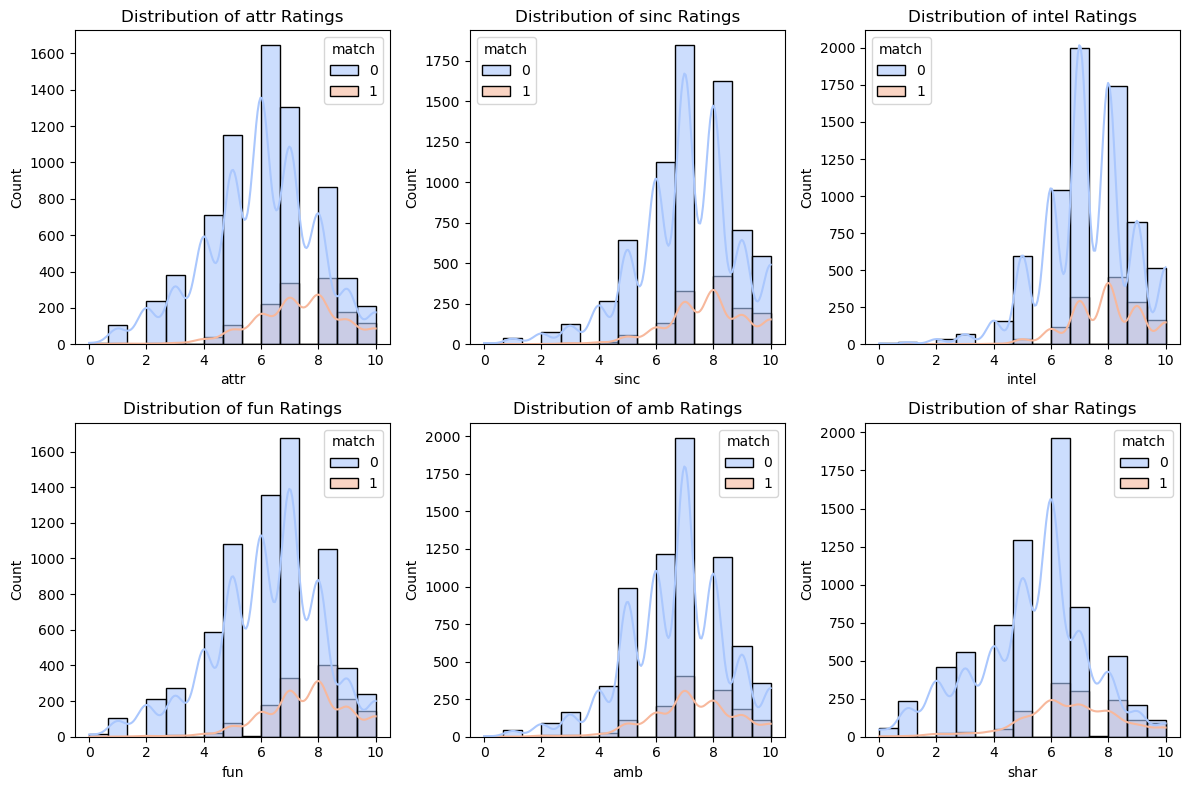

In [19]:
# Plotting attribute distributions for matches vs non matches

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
attributes = ["attr", "sinc", "intel", "fun", "amb", "shar"]

# Plot distributions
for i, attr in enumerate(attributes):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=speed_dating, x=attr, hue="match", kde=True, bins=15, ax=ax, palette="coolwarm", alpha=0.6)
    ax.set_title(f"Distribution of {attr} Ratings")
    
plt.tight_layout()
plt.show()

**Correlation of Attributes with Match Outcome:**
- The correlation values suggest that being perceived as fun (fun = 0.27) has the highest correlation with getting a match.
- Attractiveness (attr = 0.26) and shared interests (shar = 0.25) also play strong roles.
- Other attributes such as intelligence (intel = 0.17), sincerity (sinc = 0.16), and ambition (amb = 0.13) have lower but still notable correlations.

**Heatmap of Correlations:**

- The heatmap confirms that the strongest predictor of a match is fun, followed closely by attractiveness and shared interests.
- Interestingly, sincerity and intelligence show moderate correlations but are not as influential as fun or attractiveness.


**Distribution of Ratings for Matched vs. Non-Matched Pairs:**

- The distributions indicate that higher ratings in fun, attr, and shar are more likely to lead to a match.
- The match (1) distribution skews towards higher values for each attribute compared to non-matches.
- However, since most ratings are concentrated around 5-8, extreme values (too high or too low) are less common.

### Feature Engineering of Speed Dating Dataset

**Composite Attraction-Fun Score:**
- Since attr (attractiveness) and fun (fun personality) have the highest correlation with match success, we can create a combined metric.
- Formula: attraction_fun_score = (attr + fun) / 2

**Weighted Score Based on Correlation:**

- We can create a weighted sum of attributes based on their correlation with match.
- Formula: weighted_score = 0.27*fun + 0.26*attr + 0.25*shar + 0.17*intel + 0.16*sinc + 0.13*amb

**Boolean Features:**
- Convert numerical attributes to binary indicators based on median values.
- Example: is_fun_above_avg = 1 if fun > median(fun) else 0

In [24]:
# Composite Attraction-Fun Score
speed_dating['attraction_fun_score'] = (speed_dating['attr'] + speed_dating['fun']) / 2

# Weighted Score Based on Correlation with 'match'
speed_dating['weighted_score'] = (
    0.27 * speed_dating['fun'] +
    0.26 * speed_dating['attr'] +
    0.25 * speed_dating['shar'] +
    0.17 * speed_dating['intel'] +
    0.16 * speed_dating['sinc'] +
    0.13 * speed_dating['amb']
)

# Binary Features Based on Median Values
speed_dating['is_fun_above_avg'] = (speed_dating['fun'] > speed_dating['fun'].median()).astype(int)
speed_dating['is_attr_above_avg'] = (speed_dating['attr'] > speed_dating['attr'].median()).astype(int)
speed_dating['is_shar_above_avg'] = (speed_dating['shar'] > speed_dating['shar'].median()).astype(int)

# Check the new features
print(speed_dating[['attraction_fun_score', 'weighted_score', 'is_fun_above_avg', 'is_attr_above_avg', 'is_shar_above_avg']].head())

# Verify that no NaN values were introduced
print(speed_dating[['attraction_fun_score', 'weighted_score', 'is_fun_above_avg', 'is_attr_above_avg', 'is_shar_above_avg']].isnull().sum())

# Display summary statistics for verification
print(speed_dating[['attraction_fun_score', 'weighted_score', 'is_fun_above_avg', 'is_attr_above_avg', 'is_shar_above_avg']].describe())

   attraction_fun_score  weighted_score  is_fun_above_avg  is_attr_above_avg  \
0                   6.5            8.11                 0                  0   
1                   7.5            8.60                 1                  1   
2                   6.5            8.67                 1                  0   
3                   7.0            8.81                 0                  1   
4                   6.0            7.62                 0                  0   

   is_shar_above_avg  
0                  0  
1                  0  
2                  1  
3                  1  
4                  0  
attraction_fun_score    0
weighted_score          0
is_fun_above_avg        0
is_attr_above_avg       0
is_shar_above_avg       0
dtype: int64
       attraction_fun_score  weighted_score  is_fun_above_avg  \
count           8378.000000     8378.000000       8378.000000   
mean               6.305526        8.009583          0.292194   
std                1.706878        1.726269

- attraction_fun_score: The mean is around 6.31, which aligns with the average ratings of attr and fun. The max is 10, which suggests it's scaled properly.
- weighted_score: The mean is 8.01, which makes sense given the correlation weights.
- Binary Features (is_fun_above_avg, is_attr_above_avg, is_shar_above_avg):
  - Around 29% of the data has is_fun_above_avg = 1, and 44.8% has is_attr_above_avg = 1, meaning these attributes are above the median in these proportions.

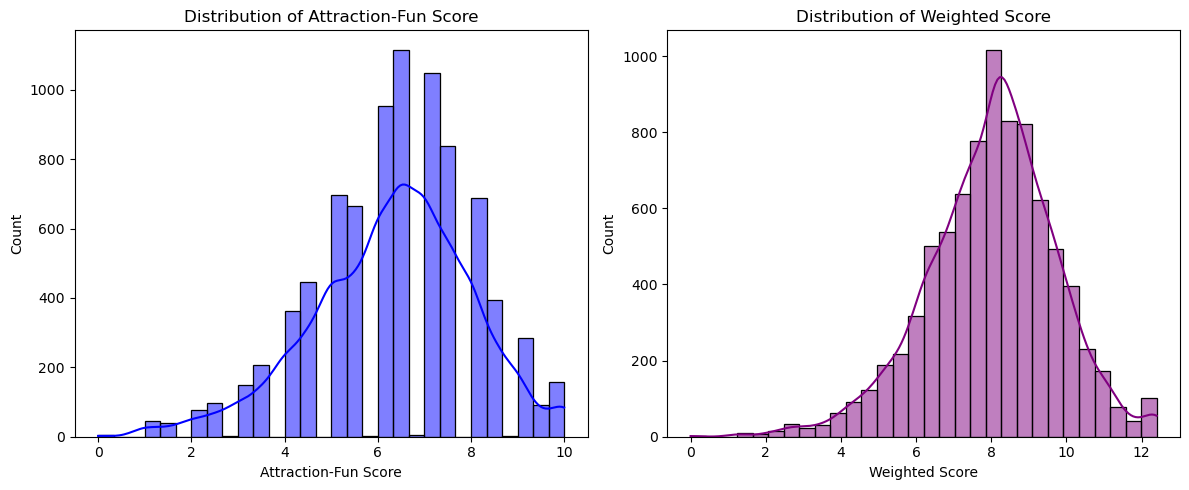

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot attraction_fun_score distribution
plt.subplot(1, 2, 1)
sns.histplot(speed_dating['attraction_fun_score'], bins=30, kde=True, color='blue')
plt.title("Distribution of Attraction-Fun Score")
plt.xlabel("Attraction-Fun Score")
plt.ylabel("Count")

# Plot weighted_score distribution
plt.subplot(1, 2, 2)
sns.histplot(speed_dating['weighted_score'], bins=30, kde=True, color='purple')
plt.title("Distribution of Weighted Score")
plt.xlabel("Weighted Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

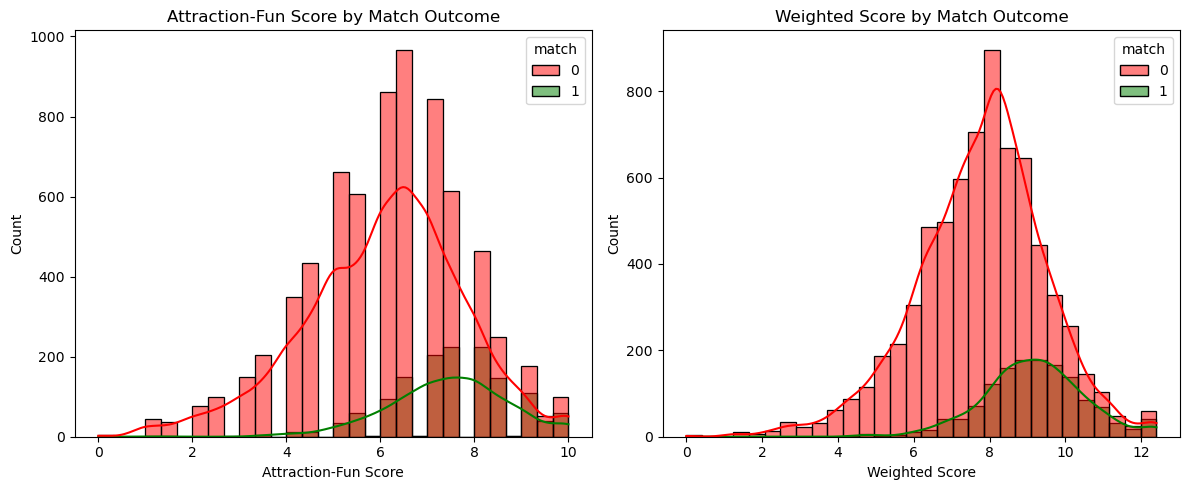

In [27]:
plt.figure(figsize=(12, 5))

# Plot attraction_fun_score by match outcome
plt.subplot(1, 2, 1)
sns.histplot(data=speed_dating, x='attraction_fun_score', hue='match', bins=30, kde=True, palette=['red', 'green'], alpha=0.5)
plt.title("Attraction-Fun Score by Match Outcome")
plt.xlabel("Attraction-Fun Score")
plt.ylabel("Count")

# Plot weighted_score by match outcome
plt.subplot(1, 2, 2)
sns.histplot(data=speed_dating, x='weighted_score', hue='match', bins=30, kde=True, palette=['red', 'green'], alpha=0.5)
plt.title("Weighted Score by Match Outcome")
plt.xlabel("Weighted Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

- The visualizations confirm that the engineered features (attraction_fun_score and weighted_score) are distributed well and show a difference between matched and non-matched pairs, making them potentially useful for predictive modeling.

**Additional Modeling Features to Use**
- I want to explore whether other features or columns in this dataset will be usefull for redictive modeling besides the match scores

**Let's check for low variance features and identify columns with very low variance**

In [31]:
import pandas as pd

# Calculate variance for numeric features
variance = speed_dating.var().sort_values()

# Identify low variance columns (threshold set at <0.05)
low_variance_features = variance[variance < 0.05].index.tolist()

# Results
print("Low Variance Features to Consider Dropping:")
print(low_variance_features)

Low Variance Features to Consider Dropping:
[]


- There are no low variance features to drop, so let's move on to checking for alternative feature correlation

- Next we'll try to identify any irrevelant columns to drop
- We'll review categorical/non-numeric columns that may not contribute to match

In [34]:
speed_dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                8378 non-null   int64  
 1   match                 8378 non-null   int64  
 2   int_corr              8378 non-null   float64
 3   age_o                 8378 non-null   int64  
 4   race_o                8378 non-null   int64  
 5   pf_o_att              8378 non-null   float64
 6   dec_o                 8378 non-null   int64  
 7   attr_o                8378 non-null   float64
 8   sinc_o                8378 non-null   float64
 9   intel_o               8378 non-null   float64
 10  fun_o                 8378 non-null   float64
 11  amb_o                 8378 non-null   float64
 12  shar_o                8378 non-null   float64
 13  age                   8378 non-null   int64  
 14  field_cd              8378 non-null   float64
 15  race                 

In [35]:
speed_dating.corr()

,gender,match,int_corr,age_o,race_o,pf_o_att,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attraction_fun_score,weighted_score,is_fun_above_avg,is_attr_above_avg,is_shar_above_avg
gender,1.000000,-0.000530,-0.000927,-0.072517,0.016777,-0.350816,-0.111550,-0.137285,-0.042610,0.049161,-0.058906,0.093032,-0.025989,0.070592,-0.080373,-0.017061,-0.111342,-0.197064,0.026232,-0.100410,0.017408,0.000966,0.230092,0.146805,-0.083416,-0.205417,-0.213418,-0.221378,-0.079389,0.220037,-0.061324,-0.113480,-0.171513,-0.312908,-0.162188,-0.128106,-0.076873,-0.329781,-0.236283,0.351404,-0.127980,-0.107308,0.050082,-0.346604,-0.132558,0.110232,0.136951,0.042424,-0.049847,0.059225,-0.093316,0.026099,0.076026,-0.003512,-0.003393,0.282965,-0.118421,-0.173819,0.027721,-0.244380,-0.178127,0.112009,-0.102160,-0.121855,0.068922,-0.181186,-0.047656,-0.199392,0.233516,0.213732,-0.106280,0.303180,-0.142758,-0.071544,-0.132446,0.103161,-0.108053,-0.012513,0.110540,0.052314,0.021805,0.086044,0.005800
match,-0.000530,1.000000,0.029839,-0.035659,-0.013394,0.015553,0.522326,0.260927,0.164673,0.171304,0.270256,0.133690,0.251816,-0.034906,-0.024501,-0.013905,-0.048932,-0.026018,-0.010307,-0.063241,-0.060291,-0.017590,0.021687,-0.004579,0.009354,0.033808,0.014879,0.031456,0.024079,0.013248,0.055203,0.020215,-0.014283,0.000151,-0.022837,0.026942,0.023023,-0.001235,0.036324,0.014739,-0.032097,0.013987,0.041468,-0.004545,-0.047964,0.521943,0.260745,0.164566,0.171279,0.270321,0.133883,0.251829,0.305302,0.254669,0.035632,-0.004573,-0.021753,0.015499,0.054878,-0.016271,-0.019382,0.016979,-0.044792,-0.022320,0.036482,-0.026990,-0.025160,-0.011555,-0.015488,0.042010,0.014757,0.017276,-0.027955,0.019133,-0.007672,0.005278,0.055310,0.000363,0.298902,0.299557,0.254571,0.246621,0.239731
int_corr,-0.000927,0.029839,1.000000,0.088292,-0.026615,-0.084691,0.018639,0.014483,0.012209,0.046885,0.010352,0.027674,0.044226,0.089658,0.068117,-0.028065,-0.082608,-0.046818,0.018204,-0.003558,-0.012390,-0.023791,-0.063725,-0.226531,-0.017828,0.083270,0.173856,0.169778,0.001346,-0.241204,-0.054628,0.158296,-0.157566,0.105137,0.120403,0.081413,0.099072,-0.056452,0.033720,-0.086719,0.030280,0.083063,-0.013358,0.022350,0.032687,0.018167,0.015157,0.012425,0.047166,0.010778,0.028341,0.044836,0.034374,0.014976,-0.061137,-0.069627,0.002792,0.103461,-0.002252,0.006465,0.041247,0.019051,-0.026684,-0.004481,-0.001632,0.012546,0.035319,-0.005435,-0.005321,0.022535,-0.011880,0.020003,-0.000474,-0.008916,0.012724,0.017657,-0.025419,0.002077,0.014604,0.033474,-0.006202,0.015545,0.030331
age_o,-0.072517,-0.035659,0.088292,1.000000,-0.056330,0.030929,0.015432,0.039261,0.013286,0.014501,0.005224,-0.023057,0.026618,0.099181,0.067141,0.006381,-0.003732,0.031435,0.001416,0.005394,0.007631,-0.004400,-0.006187,-0.019245,0.021835,0.014158,0.051610,0.052243,0.028256,-0.060553,-0.034296,0.011842,-0.009909,0.033585,0.010481,-0.002131,0.010783,0.009787,0.024538,-0.073655,0.027829,-0.009906,-0.024636,0.075991,0.050634,-0.049245,-0.050969,0.006272,0.027533,-0.040086,0.017710,0.008205,-0.039357,-0.009781,-0.109534,-0.080506,0.048444,0.045384,0.000100,0.072930,0.025144,-0.025848,0.027281,0.043491,0.002717,0.047523,0.036738,0.008141,-0.010322,-0.013524,-0.013438,0.026182,0.012887,0.011660,0.027797,0.007133,0.024736,0.000827,-0.051268,-0.016984,-0.041978,-0.038918,-0.000862
race_o,0.016777,-0.013394,-0.026615,-0.056330,1.000000,-0.053273,0.055487,-0.010645,-0.049154,-0.061954,-0.019966,-0.068323,0.000149,0.007461,0.006895,0.034028,-0.002682,-0.017739,-0.010681,-0.008060,0.

In [36]:
import pandas as pd

# Compute correlation of all features with 'match'
correlation = speed_dating.corr()['match'].abs().sort_values()

# Set threshold for low correlation (e.g., 0.05)
low_corr_features = correlation[correlation < 0.05].index.tolist()

print("Features with very low correlation with 'match':")
print(low_corr_features)

Features with very low correlation with 'match':
['theater', 'amb3_2', 'gender', 'shopping', 'amb1_1', 'attr1_2', 'tvsports', 'intel3_2', 'sinc3_2', 'exercise', 'goal', 'attr2_2', 'gaming', 'race_o', 'race', 'intel1_1', 'tv', 'attr1_1', 'fun2_2', 'museums', 'sinc2_2', 'intel1_2', 'pf_o_att', 'amb1_2', 'attr4_2', 'amb2_2', 'career_c', 'attr3_2', 'shar1_2', 'reading', 'sports', 'sinc1_2', 'intel4_2', 'movies', 'music', 'hiking', 'field_cd', 'shar4_2', 'imprelig', 'concerts', 'amb4_2', 'shar2_2', 'int_corr', 'art', 'sinc1_1', 'dining', 'age', 'met', 'age_o', 'yoga', 'fun4_2', 'fun1_1', 'intel2_2', 'sinc4_2', 'shar1_1', 'imprace']


**Categories of Features Identified for Removal**
- Demographic Features (May Not Directly Influence Matching)
  - 'gender', 'race_o', 'race', 'age', 'age_o', 'field_cd', 'career_c'
- Personal Interests & Hobbies (May Not Strongly Affect Matching)
  - 'tvsports', 'sports', 'music', 'movies', 'reading', 'concerts', 'gaming', 'hiking', 'yoga', 'art', 'museums', 'theater', 'shopping', 'dining'
- Attributes from Self-Evaluation / Partner Ratings (May Be Weak Predictors)
  - 'attr1_1', 'attr1_2', 'attr2_2', 'attr3_2', 'attr4_2', 'sinc1_1', 'sinc1_2', 'sinc2_2', 'sinc3_2', 'sinc4_2', 'intel1_1', 'intel1_2', 'intel2_2', 'intel3_2', 'intel4_2', 'fun1_1', 'fun2_2', 'fun4_2', 'amb1_1', 'amb1_2', 'amb2_2', 'amb3_2', 'amb4_2', 'shar1_1', 'shar1_2', 'shar2_2', 'shar4_2'
- Other Features
  - 'goal', 'imprace', 'imprelig', 'met', 'int_corr', 'pf_o_att'

**Let's compute feature importance using mutal information**

In [39]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Compute Mutual Information for 'match'
X = speed_dating.drop(columns=['match'])  # Features
y = speed_dating['match']                 # Target

mi_scores = mutual_info_classif(X, y, discrete_features='auto')


mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=True)  # Sort by importance

# show least important features
print("Features with the lowest Mutual Information (Potential for Removal):")
print(mi_df.head(84))  # Show the features by order of importance

Features with the lowest Mutual Information (Potential for Removal):
                 Feature  Mutual_Information
20              career_c            0.000000
76                amb3_2            0.000000
14                  race            0.000000
27                hiking            0.000000
12                   age            0.000000
31                    tv            0.000000
64                amb4_2            0.000000
36              shopping            0.000000
32               theater            0.000000
18                  date            0.000000
25               museums            0.000083
63                fun4_2            0.000187
60               attr4_2            0.000606
58                amb1_2            0.000886
26                   art            0.001131
22              tvsports            0.001372
69                fun2_2            0.001745
65               shar4_2            0.001764
75                fun3_2            0.001795
33                movies       

**We should retain the following features**
- Key features like 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar'
- Newly engineered features: 'attraction_fun_score', 'weighted_score'
- 'like', 'prob', 'dec', 'dec_o' (higher MI)
- 'is_fun_above_avg', 'is_attr_above_avg', 'is_shar_above_avg' (binary features)
- age and age_o: Age differences may impact match success.
- gender: Gender differences could still play a role.

In [41]:
# Drop columns based on low correlation + low MI
columns_to_drop = [
    'clubbing', 'amb3_2', 'fun4_2', 'sports', 'date', 'shar2_2', 'field_cd', 'music', 'theater', 'tv', 'movies',
    'shopping', 'intel4_2', 'attr1_2', 'amb4_2', 'art', 'goal', 'career_c', 'hiking', 'sinc4_2',
    'fun2_2', 'imprelig', 'amb1_2', 'sinc3_2', 'attr3_2', 'go_out', 'museums', 'attr4_2', 'tvsports', 'reading',
    'fun3_2', 'gaming', 'amb2_2', 'amb_o', 'fun1_1', 'sinc2_2', 'intel2_2', 'intel1_1',
    'intel1_2', 'yoga', 'pf_o_att', 'concerts', 'sinc1_2', 'dining', 'attr1_1', 'fun1_2', 'attr2_2',
    'shar1_2', 'shar4_2', 'exercise', 'amb1_1', 'imprace', 'sinc1_1', 'intel3_2', 'met', 'shar1_1',
    'race', 'race_o'
]

# Drop the columns
speed_dating = speed_dating.drop(columns=columns_to_drop)

# Confirm the number of remaining columns
print("Remaining columns after dropping irrelevant features:", speed_dating.shape[1])

print(speed_dating.info())

Remaining columns after dropping irrelevant features: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                8378 non-null   int64  
 1   match                 8378 non-null   int64  
 2   int_corr              8378 non-null   float64
 3   age_o                 8378 non-null   int64  
 4   dec_o                 8378 non-null   int64  
 5   attr_o                8378 non-null   float64
 6   sinc_o                8378 non-null   float64
 7   intel_o               8378 non-null   float64
 8   fun_o                 8378 non-null   float64
 9   shar_o                8378 non-null   float64
 10  age                   8378 non-null   int64  
 11  dec                   8378 non-null   int64  
 12  attr                  8378 non-null   float64
 13  sinc                  8378 non-null   float64
 14  intel          

- The dataset has been reduced to the above features.
- lets analyze specific remaining features to evaluate their relavance to match out come
    - Check gender, age and age of partner
    - binary features (is_fun_above_avg, is_attr_above_avg, is_shar_above_avg)
    - int_corr
- Re check correlations


Feature: gender
        count      mean       std  min  25%  50%  75%  max
match                                                     
0      6998.0  0.500714  0.500035  0.0  0.0  1.0  1.0  1.0
1      1380.0  0.500000  0.500181  0.0  0.0  0.5  1.0  1.0


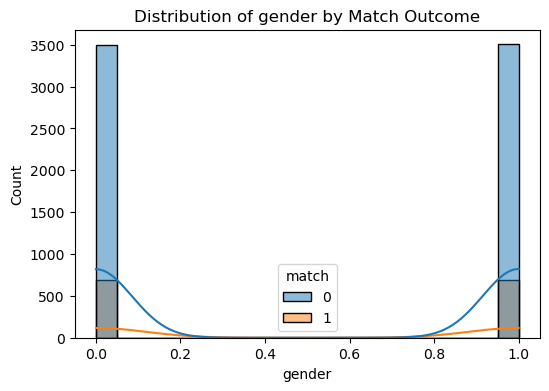

T-Test p-value for gender: 0.96132
 gender does not show a strong statistical difference.

Feature: age
        count       mean       std   min   25%   50%   75%   max
match                                                           
0      6998.0  26.409831  3.590688  18.0  24.0  26.0  28.0  55.0
1      1380.0  26.076087  3.301725  19.0  24.0  26.0  28.0  42.0


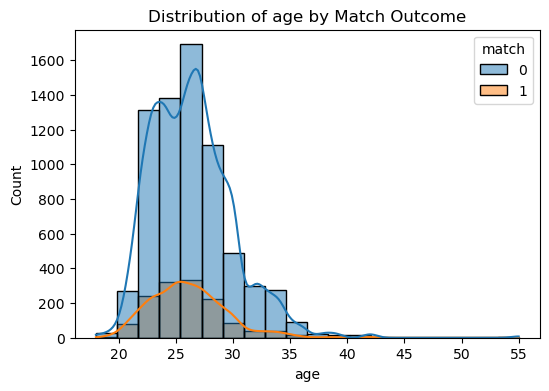

T-Test p-value for age: 0.00073
 age has a statistically significant difference between matched and non-matched.

Feature: age_o
        count       mean       std   min   25%   50%   75%   max
match                                                           
0      6998.0  26.416548  3.584676  18.0  24.0  26.0  28.0  55.0
1      1380.0  26.076087  3.301725  19.0  24.0  26.0  28.0  42.0


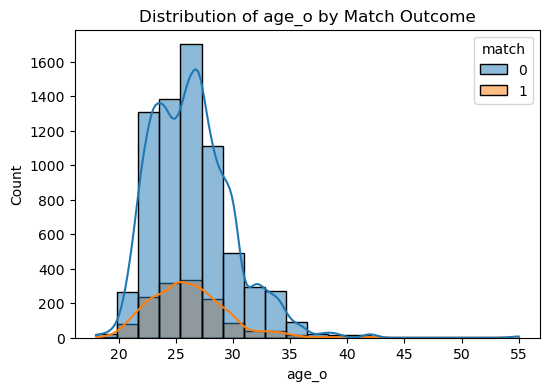

T-Test p-value for age_o: 0.00057
 age_o has a statistically significant difference between matched and non-matched.

Feature: int_corr
        count      mean       std   min   25%   50%   75%   max
match                                                          
0      6998.0  0.188314  0.301020 -0.73 -0.01  0.20  0.42  0.91
1      1380.0  0.212594  0.305288 -0.83  0.00  0.24  0.46  0.81


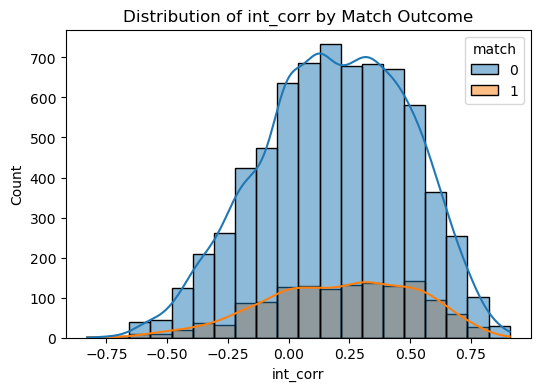

T-Test p-value for int_corr: 0.00686
 int_corr has a statistically significant difference between matched and non-matched.

Feature: is_fun_above_avg
        count      mean       std  min  25%  50%  75%  max
match                                                     
0      6998.0  0.240783  0.427589  0.0  0.0  0.0  0.0  1.0
1      1380.0  0.552899  0.497374  0.0  0.0  1.0  1.0  1.0


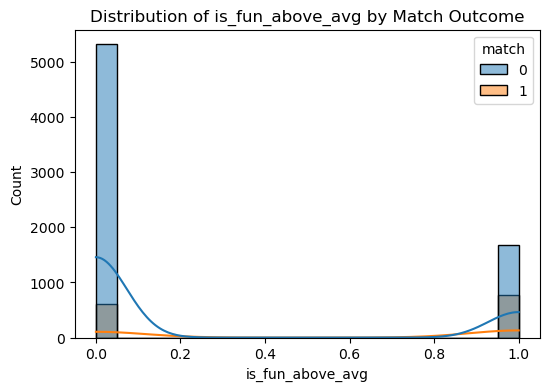

T-Test p-value for is_fun_above_avg: 0.00000
 is_fun_above_avg has a statistically significant difference between matched and non-matched.

Feature: is_attr_above_avg
        count      mean       std  min  25%  50%  75%  max
match                                                     
0      6998.0  0.393970  0.488663  0.0  0.0  0.0  1.0  1.0
1      1380.0  0.724638  0.446859  0.0  0.0  1.0  1.0  1.0


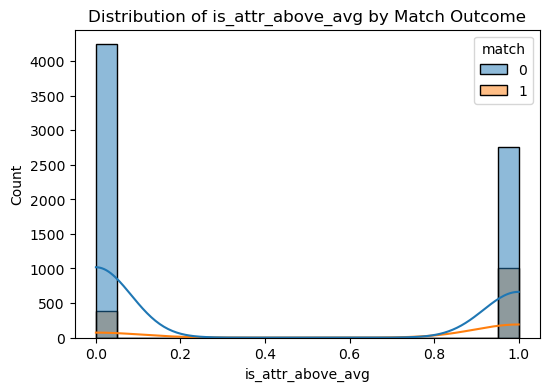

T-Test p-value for is_attr_above_avg: 0.00000
 is_attr_above_avg has a statistically significant difference between matched and non-matched.

Feature: is_shar_above_avg
        count      mean       std  min  25%  50%  75%  max
match                                                     
0      6998.0  0.243212  0.429053  0.0  0.0  0.0  0.0  1.0
1      1380.0  0.536957  0.498813  0.0  0.0  1.0  1.0  1.0


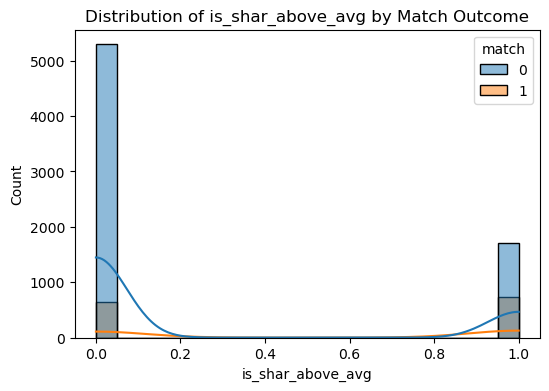

T-Test p-value for is_shar_above_avg: 0.00000
 is_shar_above_avg has a statistically significant difference between matched and non-matched.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Function to compare distributions for matched vs. non-matched cases
def compare_feature(feature):
    print(f"\nFeature: {feature}")
    print(speed_dating.groupby('match')[feature].describe())

    # Plot distributions
    plt.figure(figsize=(6,4))
    sns.histplot(data=speed_dating, x=feature, hue='match', kde=True, bins=20)
    plt.title(f"Distribution of {feature} by Match Outcome")
    plt.show()

    # T-test for statistical significance
    t_stat, p_val = ttest_ind(speed_dating[speed_dating['match'] == 1][feature],
                              speed_dating[speed_dating['match'] == 0][feature], equal_var=False)
    print(f"T-Test p-value for {feature}: {p_val:.5f}")
    if p_val < 0.05:
        print(f" {feature} has a statistically significant difference between matched and non-matched.")
    else:
        print(f" {feature} does not show a strong statistical difference.")

# Analyze key features
features_to_analyze = ['gender', 'age', 'age_o', 'int_corr', 'is_fun_above_avg', 'is_attr_above_avg', 'is_shar_above_avg']
for feature in features_to_analyze:
    compare_feature(feature)

- Based on results, gender has no significant difference between matched and non-matched groups so we will remove
- we will keep all others

In [45]:
speed_dating = speed_dating.drop(columns=['gender'])
print(speed_dating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match                 8378 non-null   int64  
 1   int_corr              8378 non-null   float64
 2   age_o                 8378 non-null   int64  
 3   dec_o                 8378 non-null   int64  
 4   attr_o                8378 non-null   float64
 5   sinc_o                8378 non-null   float64
 6   intel_o               8378 non-null   float64
 7   fun_o                 8378 non-null   float64
 8   shar_o                8378 non-null   float64
 9   age                   8378 non-null   int64  
 10  dec                   8378 non-null   int64  
 11  attr                  8378 non-null   float64
 12  sinc                  8378 non-null   float64
 13  intel                 8378 non-null   float64
 14  fun                   8378 non-null   float64
 15  amb                  

- Let's compute correlations agains

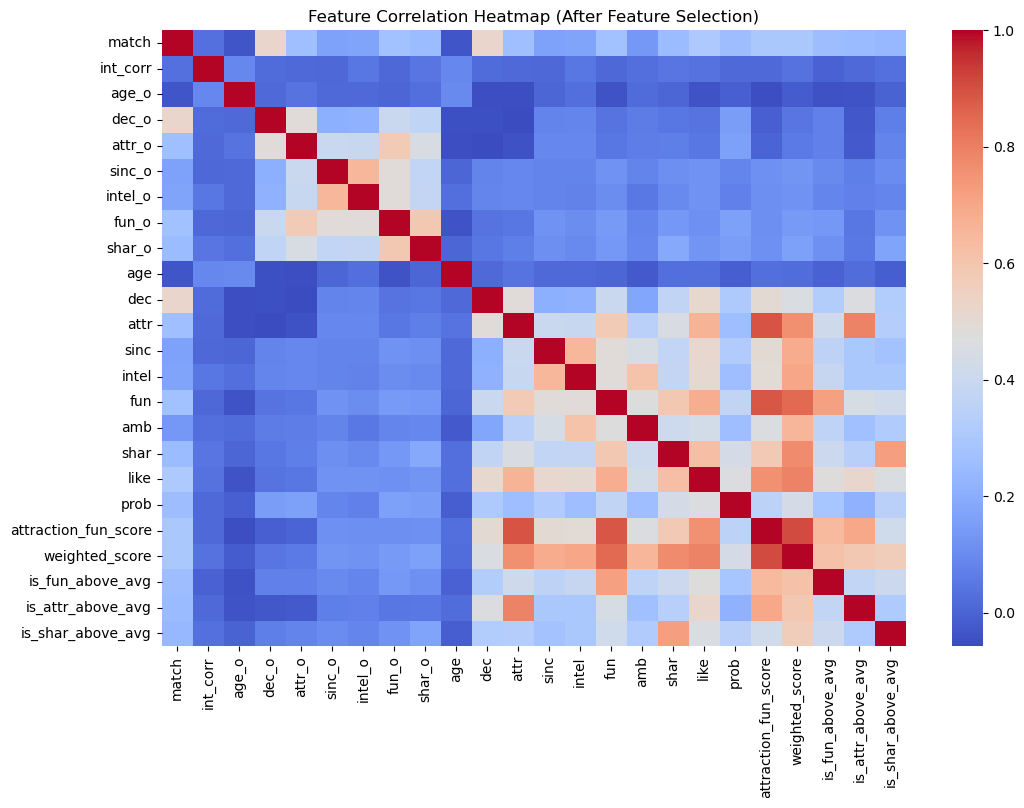

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix with heat map
plt.figure(figsize=(12,8))
sns.heatmap(speed_dating.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (After Feature Selection)")
plt.show()


**There are still some features I am concerned abot keeping, plus ideas that i have for feature engineering, but we will proceed with modeling and adjust as needed.**

In [49]:
speed_dating.to_csv("speed_dating_cleaned_for_modeling.csv", index=False)

In [50]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\samue\OneDrive\Data Science and Analytics\Data 534\Data 534 Machine Learning Project\Datasets\Speed_Dating\speed_dating_cleaned_for_modeling.csv")

# Display basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match                 8378 non-null   int64  
 1   int_corr              8378 non-null   float64
 2   age_o                 8378 non-null   int64  
 3   dec_o                 8378 non-null   int64  
 4   attr_o                8378 non-null   float64
 5   sinc_o                8378 non-null   float64
 6   intel_o               8378 non-null   float64
 7   fun_o                 8378 non-null   float64
 8   shar_o                8378 non-null   float64
 9   age                   8378 non-null   int64  
 10  dec                   8378 non-null   int64  
 11  attr                  8378 non-null   float64
 12  sinc                  8378 non-null   float64
 13  intel                 8378 non-null   float64
 14  fun                   8378 non-null   float64
 15  amb                  

In [51]:
# Get summary statistics
print(df.describe(include='all'))

             match     int_corr        age_o        dec_o       attr_o  \
count  8378.000000  8378.000000  8378.000000  8378.000000  8378.000000   
mean      0.164717     0.192313    26.360468     0.419551     6.185593   
std       0.370947     0.301843     3.541689     0.493515     1.925701   
min       0.000000    -0.830000    18.000000     0.000000     0.000000   
25%       0.000000    -0.010000    24.000000     0.000000     5.000000   
50%       0.000000     0.200000    26.000000     0.000000     6.000000   
75%       0.000000     0.430000    28.000000     1.000000     8.000000   
max       1.000000     0.910000    55.000000     1.000000    10.500000   

            sinc_o      intel_o        fun_o       shar_o          age  \
count  8378.000000  8378.000000  8378.000000  8378.000000  8378.000000   
mean      7.169253     7.355813     6.426355     5.542313    26.354858   
std       1.710796     1.523495     1.915490     2.020583     3.546684   
min       0.000000     0.000000     0

In [52]:
# Count duplicate rows
print(df.duplicated().sum())

11


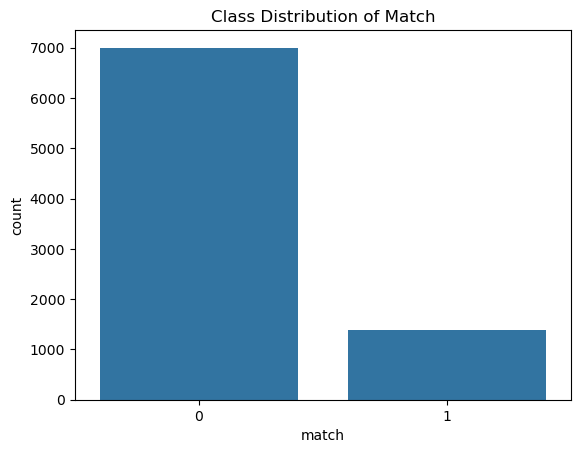

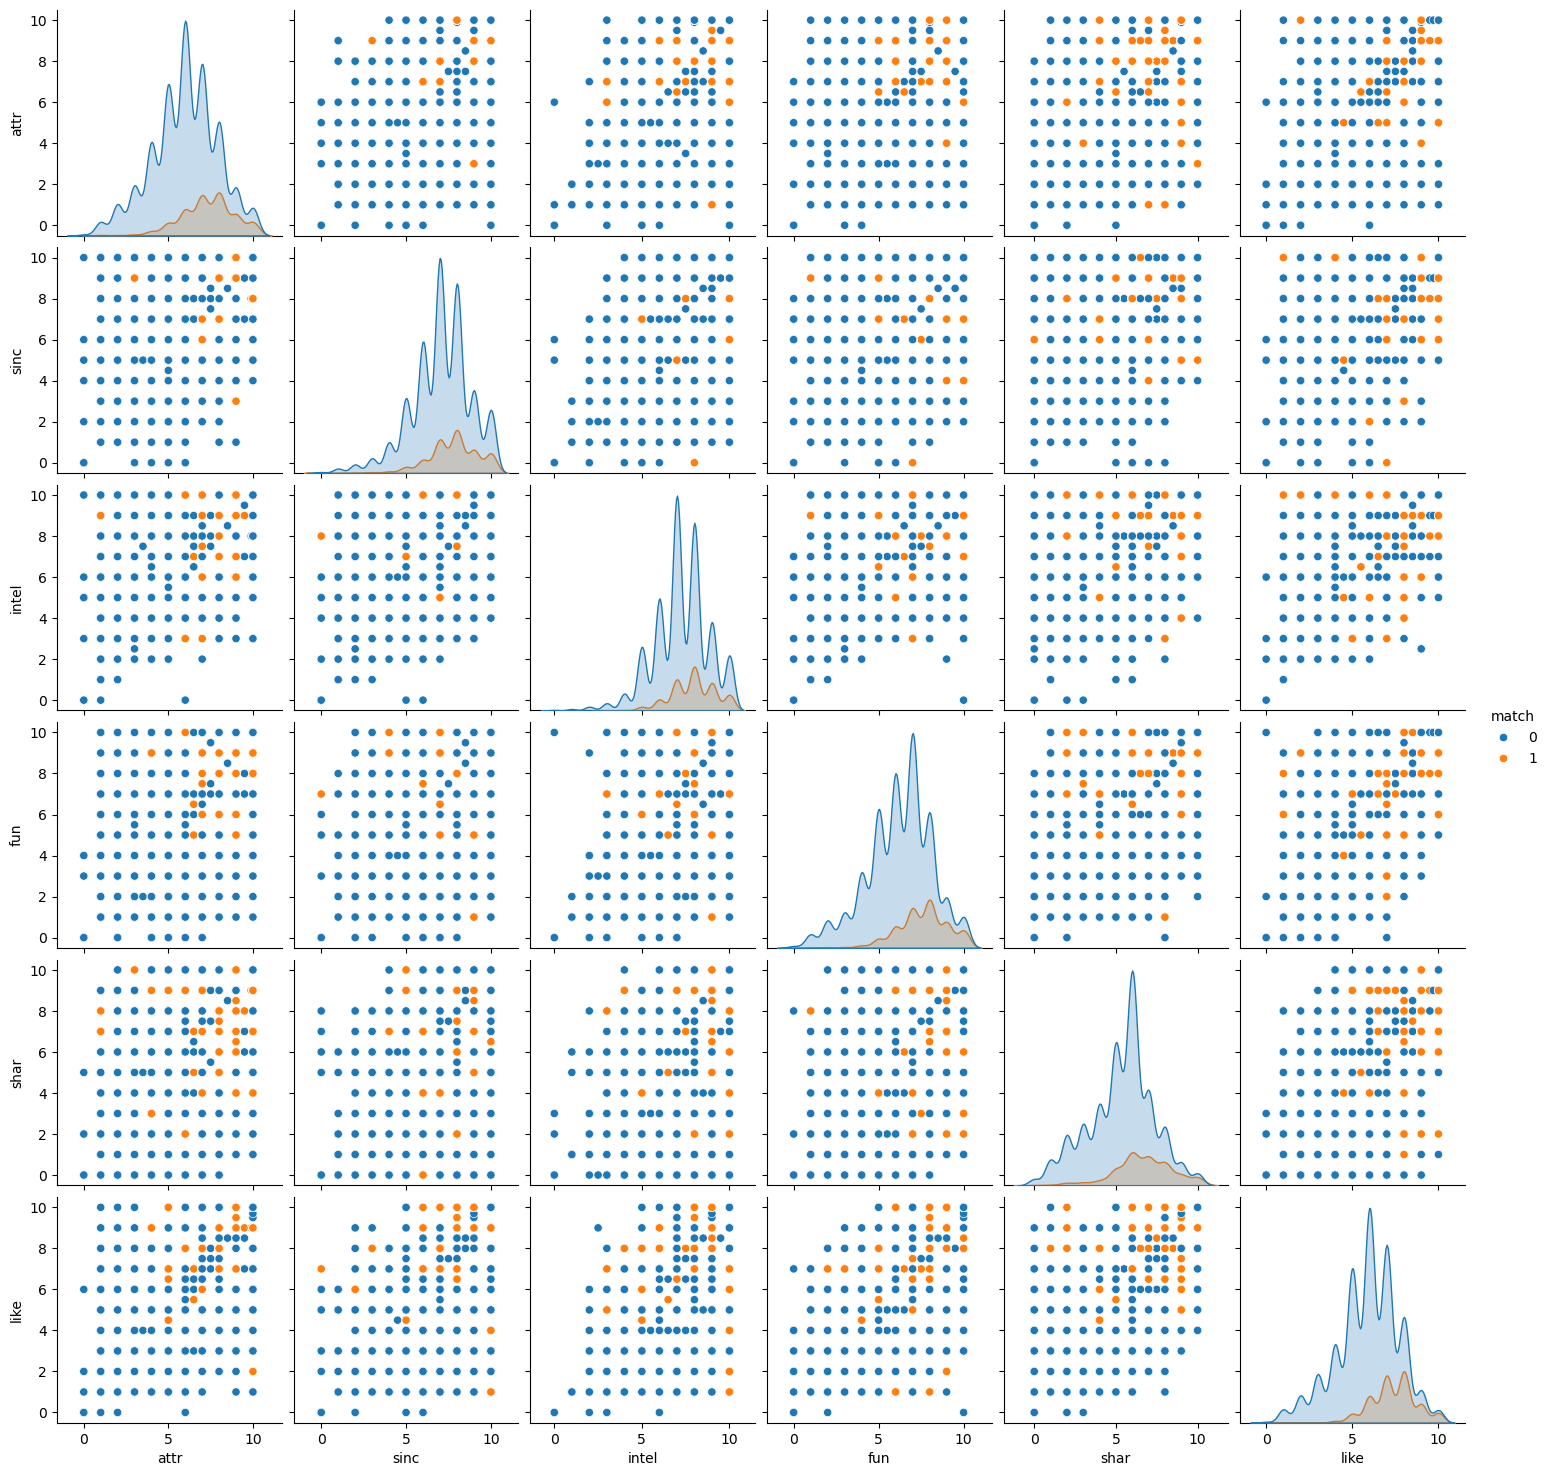

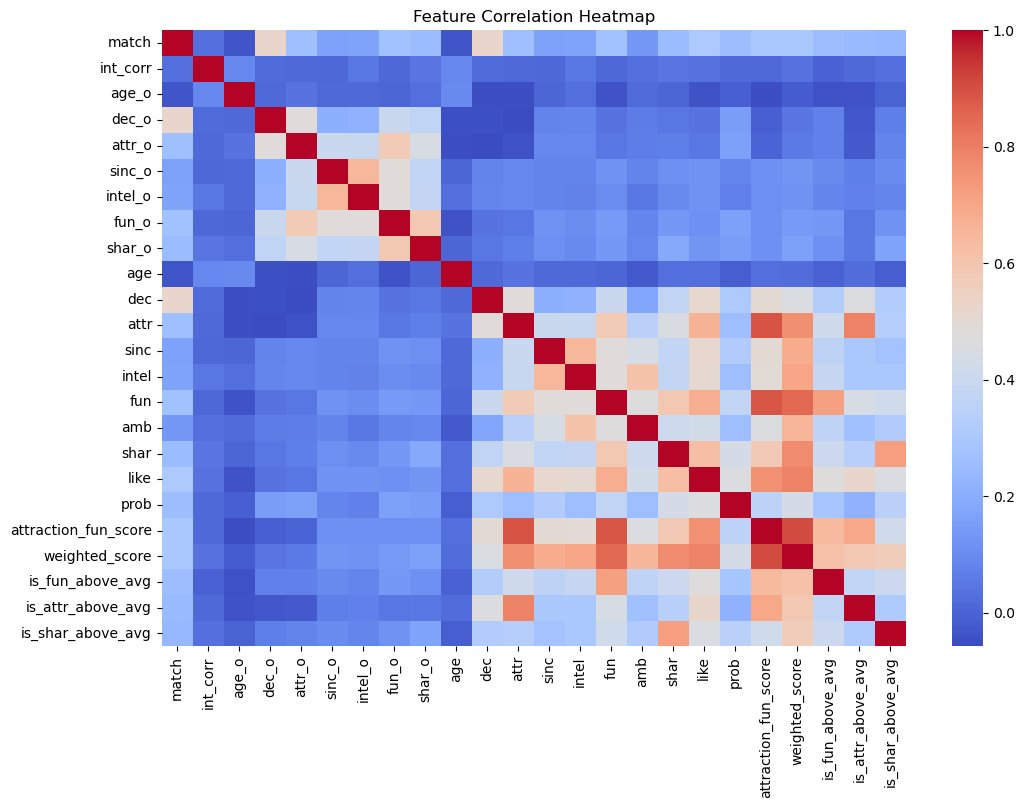

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance
sns.countplot(x=df['match'])
plt.title("Class Distribution of Match")
plt.show()

# Pairplot of selected features
sns.pairplot(df[['match', 'attr', 'sinc', 'intel', 'fun', 'shar', 'like']], hue='match', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()